#  New Project

In [2]:
## Importing the Neccessary libraries
import requests
from bs4 import BeautifulSoup
import re
import numpy as np

In [3]:
## Scraped Website : IMDB
series = []
rank = []
year = []
licence = []
gen = []
ratings = []
votes = []
duration = []
stars = []



for i in range(1,952,50):
    urls = f"https://www.imdb.com/search/title/?title_type=tv_series&year=2010-01-01,2019-12-31&start={i}&ref_=adv_nxt"
    pages = requests.get(urls)
    soup = BeautifulSoup(pages.text)
    det = soup.find_all("h3",class_="lister-item-header")
    cer = soup.find_all("span", class_ = "certificate")
    genre = soup.find_all("span", class_ ="genre")
    rati = soup.find_all("div", class_ = "inline-block ratings-imdb-rating")
    vote = soup.find_all("p", class_= "sort-num_votes-visible")
    all_det = soup.find_all("p", class_ = "text-muted")
    s = soup.find_all("p", class_ = "")
    
    for i in det:
        rank.append(i.text.split()[0].replace(".",""))
        series.append(" ".join(re.findall(r"[A-Za-z]+",i.text)))
        year.append(re.findall(r"\d+",i.text)[1])
    
    for i in cer:
        licence.append(i.text)
        if len(licence) != 1000:
            licence.append("18+")
            
    for i in genre:
        gen.append(i.text.split()[0])
        
    for i in rati:
        ratings.append(i.text.split()[0])
        
    for i in vote:
        votes.append(i.text.split()[1])
        
    
    for i in all_det:
        x = i.text
        y = re.findall(r"\d+ [min]", x)
        if len(y) != 0:
            duration.append(y)
        else:
            pass
        
    for i in s:
        stars.append(i.text.split()[1])
        

    
    
    
    

In [4]:
last_duration = []

for i in duration:
    for j in i:
        last_duration.append(j)
        

In [5]:
# Checking the length of the all lists
#to create a dataFrame we need same no.of Values
print("Length of the Rank:",len(rank))
print("Length of the Year:",len(year))
print("Length of the Series:",len(series))
print("Length of the Duration:",len(last_duration))
print("Length of the Stars:",len(stars))
print("Length of the Certifcate:",len(certificate))
print("Length of the Genre:",len(gen))
print("Length of the Votes:",len(votes))

Length of the Rank: 1000
Length of the year: 1000
Length of the Series: 1000
Length of the Duration: 1000
Length of the Stars: 1000
Length of the Certifcate: 1000
Length of the Genre: 1000
Length of the Votes: 1000
Length of the Ratings: 1000


In [6]:
#  Creating the DataFrame
import pandas as pd

#  Exporting the dataframe to csv name("Final_data.csv")

In [238]:
#df.to_csv("Final_data.csv")

# 

In [7]:
#Importing the file again named ("Final_data.csv") that we exported
import pandas as pd

In [8]:
data = pd.read_csv("Final_data.csv")

In [9]:
## Raw Data
data

Unnamed: 0   Rank                   Series_Name  Release_year Duration  \
0             0      1                      Euphoria          2019     55 m   
1             1      2                Peaky Blinders          2013     60 m   
2             2      3              The Walking Dead          2010     44 m   
3             3      4      The Marvelous Mrs Maisel          2017     57 m   
4             4      5                       Vikings          2013     44 m   
..          ...    ...                           ...           ...      ...   
995         995    996                          Avlu          2018     40 m   
996         996    997  The Real Housewives of Miami          2011     40 m   
997         997    998                   Sweetbitter          2018     40 m   
998         998    999                Bubble Guppies          2011     40 m   
999         999  1,000                   Delhi Crime             0     40 m   

          Genre      Star Licence No_of_votes  Rating  
0         Drama  Zendaya,     18+     135,017     8.5  
1        Crime,   Cillian     18+     462,470     8.8  
2        Drama,    Andrew       A     934,191     8.3  
3       Comedy,    Rachel     18+     102,267     8.7  
4       Action,  Katheryn     18+     497,689     8.6  
..          ...       ...     ...         ...     ...  
995      Crime,     Demet     18+       1,139     3.3  
996  Reality-TV   Adriana      18       4,124     7.0  
997       Drama      Ella     18+       1,472     6.5  
998  Animation,   Brianna      13      18,385     8.5  
999      Crime,   Shefali     18+     102,520     7.6  

[1000 rows x 10 columns]

In [4]:
##  Using info method we can check null values and info of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   Rank          1000 non-null   object 
 2   Series_Name   998 non-null    object 
 3   Release_year  1000 non-null   int64  
 4   Duration      1000 non-null   object 
 5   Genre         1000 non-null   object 
 6   Star          1000 non-null   object 
 7   Licence       1000 non-null   object 
 8   No_of_votes   1000 non-null   object 
 9   Rating        1000 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 78.2+ KB


In [5]:
## Checking the null values 
data.isnull().sum()

Unnamed: 0      0
Rank            0
Series_Name     2
Release_year    0
Duration        0
Genre           0
Star            0
Licence         0
No_of_votes     0
Rating          0
dtype: int64

In [6]:
##  Cleaning Data
#data frame has no null values except the Series_name has 2 null values we have to drop the rows instead of columns

In [7]:
data.dropna(axis = 0, how ='any', inplace = True) 

In [8]:
# droping the unnecessary column i.e, unnamed: 0

data.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          998 non-null    object 
 1   Series_Name   998 non-null    object 
 2   Release_year  998 non-null    int64  
 3   Duration      998 non-null    object 
 4   Genre         998 non-null    object 
 5   Star          998 non-null    object 
 6   Licence       998 non-null    object 
 7   No_of_votes   998 non-null    object 
 8   Rating        998 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 78.0+ KB


In [10]:
data.drop(data.tail(1).index , inplace = True)

In [11]:
# now we have a clean data except the dtype of the columns

In [12]:
###  Changing the dtype of the columns
data["Rank"] = data['Rank'].astype(int)

In [13]:
b = []
for i in data["No_of_votes"]:
    b.append(i.replace(",",""))
data["No_of_votes"] = b

data["No_of_votes"] = data["No_of_votes"].astype(int)

In [14]:
a = []
for i in data["Duration"]:
    x = i.split()[0]
    if len(x) == 4 or len(x) == 1:
        a.append(40)
    else:
        a.append(x)
        
    

#data["Duration"][0].split()

In [15]:
data["Duration"] = a
data["Duration"] = data["Duration"].astype(int)

In [16]:
##  Changing some wrong values with mean, meadian or mode or Randomly Guessing
# changing the 18+ to 18 and 13+ to 13 so on

c = []
for i in data["Licence"]:
    c.append(i.replace("+",""))
    
    
data["Licence"] = c    


In [17]:
data["Licence"].unique()

array(['18', 'A', '16', '13', '15', 'UA 16', 'U', '7', '12', 'UA', 'UA 7',
       'PG', 'Not Rated', 'All', 'UA 13'], dtype=object)

In [18]:
new_lic = []
for i in data["Licence"]:
    if i == "UA 16" or i == "15" or i == "PG" or i== "UA 13" or i == "13":
        new_lic.append("PG - 13")
    elif i == "7" or i == "12" or i == 'U' or i == 'UA 7' or i == "Not Rated":
        new_lic.append("UA")
    else:
        new_lic.append(i)
    
data["Licence"] = new_lic

In [19]:
# filling wrong years with median of the all release years

non_years = [90,100,8,2,10,101,4,23,13,9,15,12,1,0,19,600]
new_year = []
for i in data["Release_year"]:
    if i in non_years:
        new_year.append(2016)
    else:
        new_year.append(i)
data["Release_year"] = new_year

In [20]:
#  Cross checking the DataFrame
data

Rank                   Series_Name  Release_year  Duration       Genre  \
0       1                      Euphoria          2019        55       Drama   
1       2                Peaky Blinders          2013        60      Crime,   
2       3              The Walking Dead          2010        44      Drama,   
3       4      The Marvelous Mrs Maisel          2017        57     Comedy,   
4       5                       Vikings          2013        44     Action,   
..    ...                           ...           ...       ...         ...   
994   995                  The Good Cop          2018        40     Comedy,   
995   996                          Avlu          2018        40      Crime,   
996   997  The Real Housewives of Miami          2011        40  Reality-TV   
997   998                   Sweetbitter          2018        40       Drama   
998   999                Bubble Guppies          2011        40  Animation,   

         Star  Licence  No_of_votes  Rating  
0    Zendaya,       18       135017     8.5  
1     Cillian       18       462470     8.8  
2      Andrew        A       934191     8.3  
3      Rachel       18       102267     8.7  
4    Katheryn       18       497689     8.6  
..        ...      ...          ...     ...  
994      Tony       UA         1587     7.3  
995     Demet       18         1139     3.3  
996   Adriana       18         4124     7.0  
997      Ella       18         1472     6.5  
998   Brianna  PG - 13        18385     8.5  

[997 rows x 9 columns]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          997 non-null    int32  
 1   Series_Name   997 non-null    object 
 2   Release_year  997 non-null    int64  
 3   Duration      997 non-null    int32  
 4   Genre         997 non-null    object 
 5   Star          997 non-null    object 
 6   Licence       997 non-null    object 
 7   No_of_votes   997 non-null    int32  
 8   Rating        997 non-null    float64
dtypes: float64(1), int32(3), int64(1), object(4)
memory usage: 66.2+ KB


In [22]:
##  Descriptive Stats of the DataFrame##  Descriptive Stats of the DataFrame
data.describe()

Rank  Release_year    Duration   No_of_votes      Rating
count  997.000000    997.000000  997.000000  9.970000e+02  997.000000
mean   500.390171   2015.577733   47.776329  4.469550e+04    7.612036
std    288.511599      2.885225   34.988827  1.071449e+05    0.866498
min      1.000000   1988.000000   10.000000  9.100000e+01    2.300000
25%    251.000000   2013.000000   30.000000  6.029000e+03    7.200000
50%    500.000000   2016.000000   44.000000  1.440300e+04    7.700000
75%    750.000000   2018.000000   60.000000  3.734800e+04    8.200000
max    999.000000   2019.000000  542.000000  1.960998e+06    9.700000

# 

In [23]:
#  Now  Data is ready for  Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px

# 

In [ ]:
# Univariate Analysis 

C:\Users\SREE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


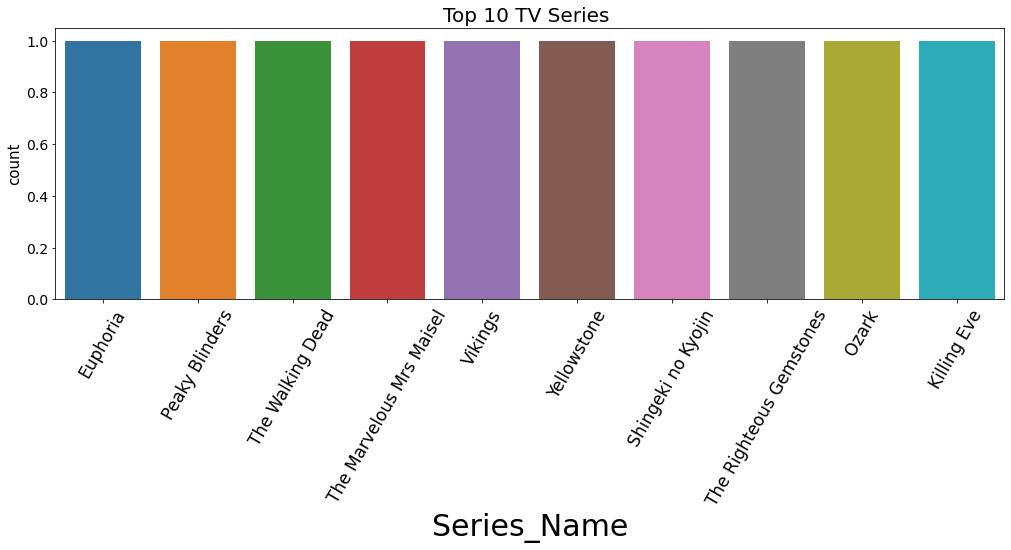

In [24]:
plt.figure(figsize=(17,5))
plt.title("Top 10 TV Series ",fontsize=20)

plt.ylabel("Count",fontsize=15)
plt.xlabel("Series Name",fontsize=30)


plt.xticks(rotation = 60,fontsize = 17)
plt.yticks(fontsize = 14)


sns.countplot(data["Series_Name"][:10])
plt.show()

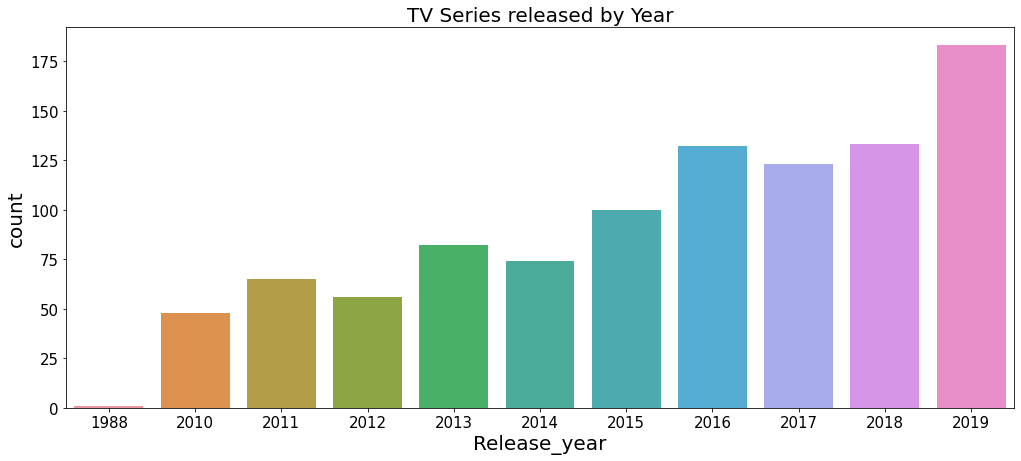

In [25]:
##  Let's Try to find out Which year most of the TVSeries are released
plt.figure(figsize=(17,7))
plt.title("TV Series released by Year",fontsize=20)



plt.ylabel("Count",fontsize=20)
plt.xlabel("Release Year",fontsize=20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

sns.countplot(x='Release_year', data=data)
plt.show()

#In the year 2019 most of the TV series are released but in 1988 there is one best TV Series released### 
#Which type of ceritficate TV Series are mostly released?

C:\Users\SREE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


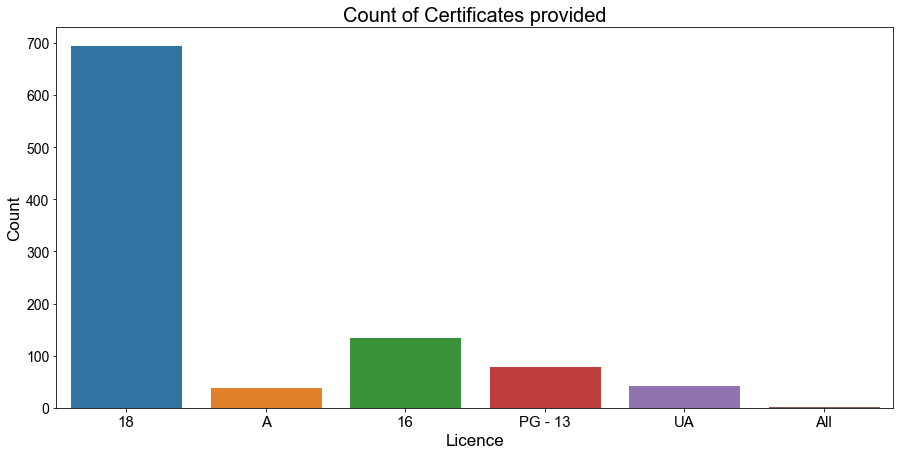

In [26]:

ratings = data["Licence"]
fig,axs=plt.subplots(figsize=(15,7))
sns.set_style('darkgrid')
g=sns.countplot(ratings)
g.set_title("Count of Certificates provided",fontsize=20)

plt.ylabel("Count",fontsize=17)
plt.xlabel("Licence",fontsize=17)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 14)

plt.show()

###  From The above plot we can see most of the TV Series are 18+ Certified  and next 16 Rated
### But we can't get the percentage of those plot 
### for percentage we need to plot Pie chart

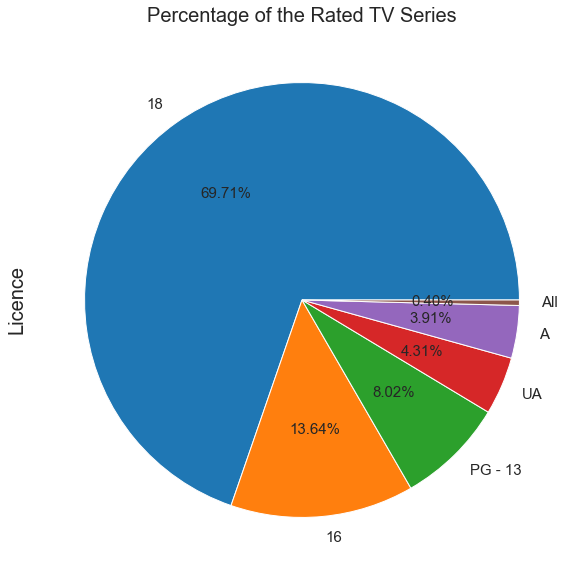

In [27]:
plt.figure(figsize=(10,10))
plt.title("Percentage of the Rated TV Series",fontsize=20)
data["Licence"].value_counts().plot.pie(autopct="%.2f%%",fontsize=15);


plt.ylabel("Licence",fontsize=20)

plt.show()


#from the above Pie chart we can clearly see the percentage of every Certificate of the TV Series

# 

#Which stars acted in more TV Series

In [28]:
x = data["Star"].value_counts()[:10]
x.values

array([14, 12, 11,  9,  8,  8,  7,  7,  7,  6], dtype=int64)

C:\Users\SREE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


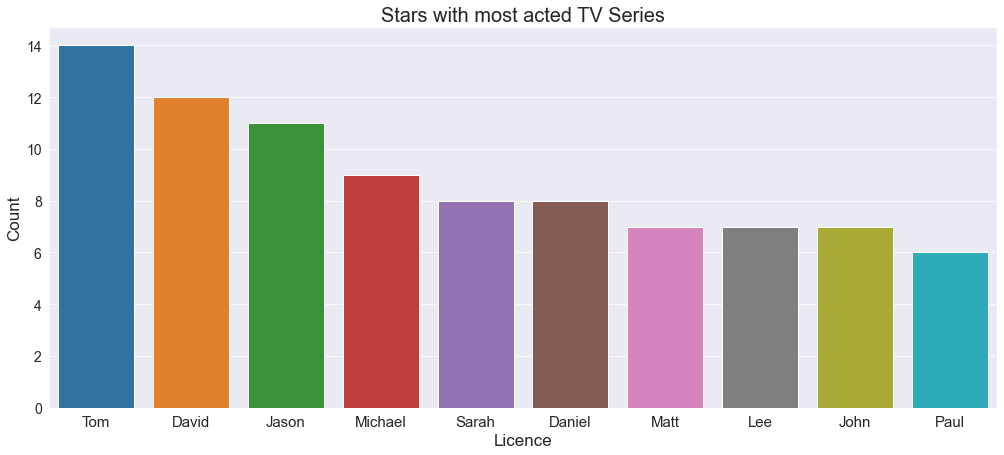

In [29]:


plt.figure(figsize=(17,7))
plt.title("Stars with most acted TV Series",fontsize=20)
sns.barplot(x.index,x.values)

plt.ylabel("Count",fontsize=17)
plt.xlabel("Licence",fontsize=17)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 14)
plt.show()

### Tom, David and Jason are acted in more than 10 TV Series

# 

#Which Genre TV Series are people prefferd to watch?

C:\Users\SREE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



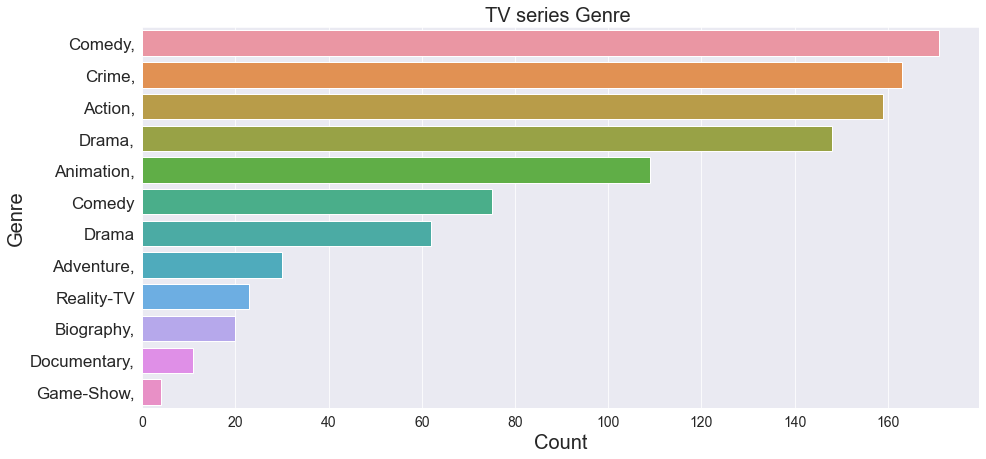

In [39]:
count=Counter(data["Genre"])
count=count.most_common()[:12]
x,y=map(list,zip(*count))

plt.figure(figsize=(15,7))
#fig,axs=plt.subplots(figsize=(30,7))
g=sns.barplot(y,x)
g.set_ylabel("Genres")


plt.title("TV series Genre ",fontsize=20)

plt.ylabel("Genre",fontsize=20)

plt.xlabel("Count",fontsize=20)


plt.xticks(fontsize = 14)
plt.yticks(fontsize = 17)



plt.show()

###  From the Above plot we can see that Comedy and Crime Genre TV Series are released

# 

#Duration of the TV Series

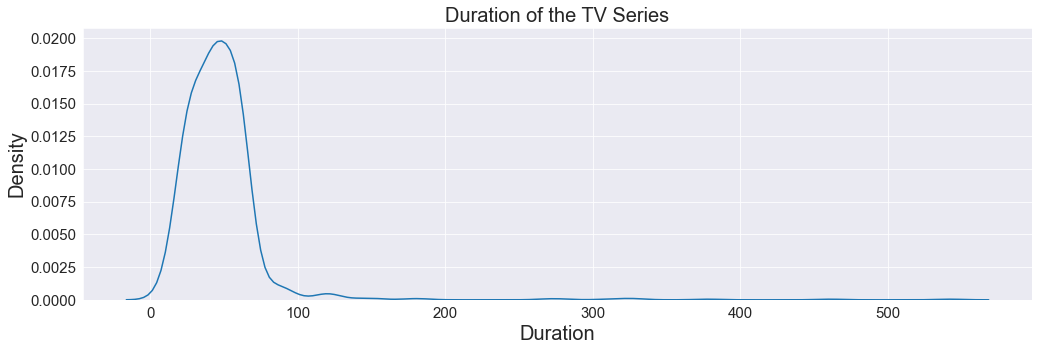

In [31]:


#fig,axs=plt.subplots(figsize=(20,5))
plt.figure(figsize=(17,5))

plt.title("Duration of the TV Series",fontsize=20)
g=sns.kdeplot(data['Duration'])

plt.ylabel("Density",fontsize=20)
plt.xlabel("Duration",fontsize=20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()


###  The Duration of the most of the TV Seires is aprroximately 50 Minutes 
### but some of them are with 500 mins also theese are the outlires of this Dataframe
### To find out outliers  we need to plot box plot 




C:\Users\SREE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


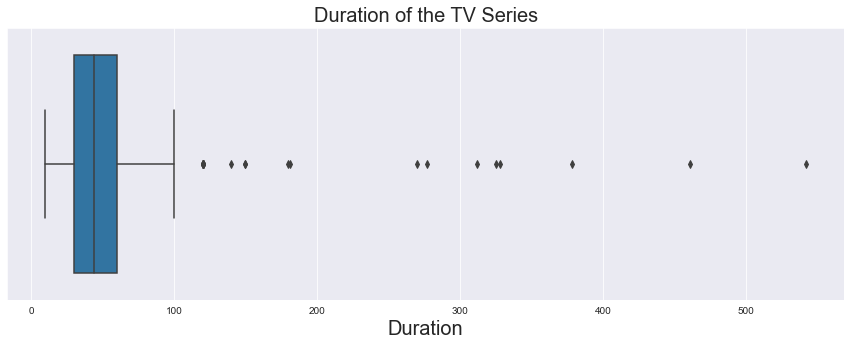

In [32]:
plt.figure(figsize=(15,5))

sns.boxplot(data["Duration"])
plt.title("Duration of the TV Series",fontsize=20)
plt.xlabel("Duration",fontsize=20)

plt.show()

#In the Graph with the dots are outlieres 

In [33]:

px.box(data.Duration)


# 

## Distibution of Ratings

C:\Users\SREE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



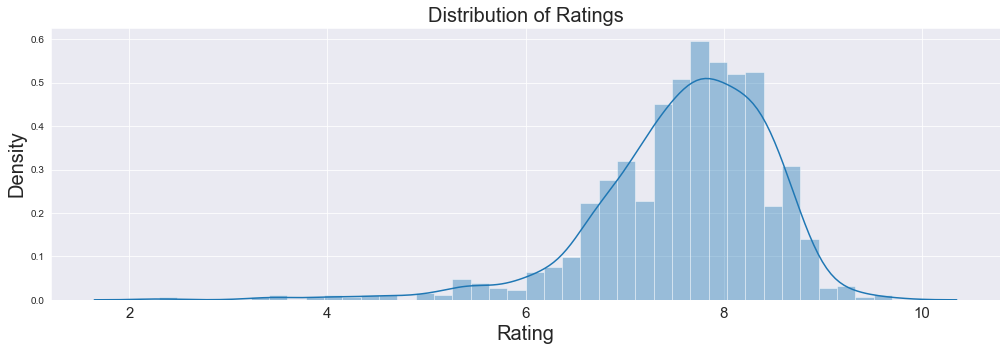

In [34]:
#fig,axs=plt.subplots(figsize=(20,5))
plt.figure(figsize=(17,5))


g=sns.distplot(data['Rating'],bins=40)
g.set_title("Distribution of Ratings",fontsize=20)


plt.ylabel("Density",fontsize=20)
plt.xlabel("Rating",fontsize=20)


plt.xticks(fontsize = 15)
plt.yticks(fontsize = 10)



plt.show()

## The Rating of the IMDB is mostly is 7.6 for the TV Series

# 

In [35]:
import plotly.figure_factory as ff



x = data["Rating"]
hist_data = [x]
group_labels = ['Rating'] # name of the dataset



fig = ff.create_distplot(hist_data, group_labels,bin_size=0.2,)
fig.show()

# 

#  Bivariate Analysis

## TV series Based on IMDB Ranking

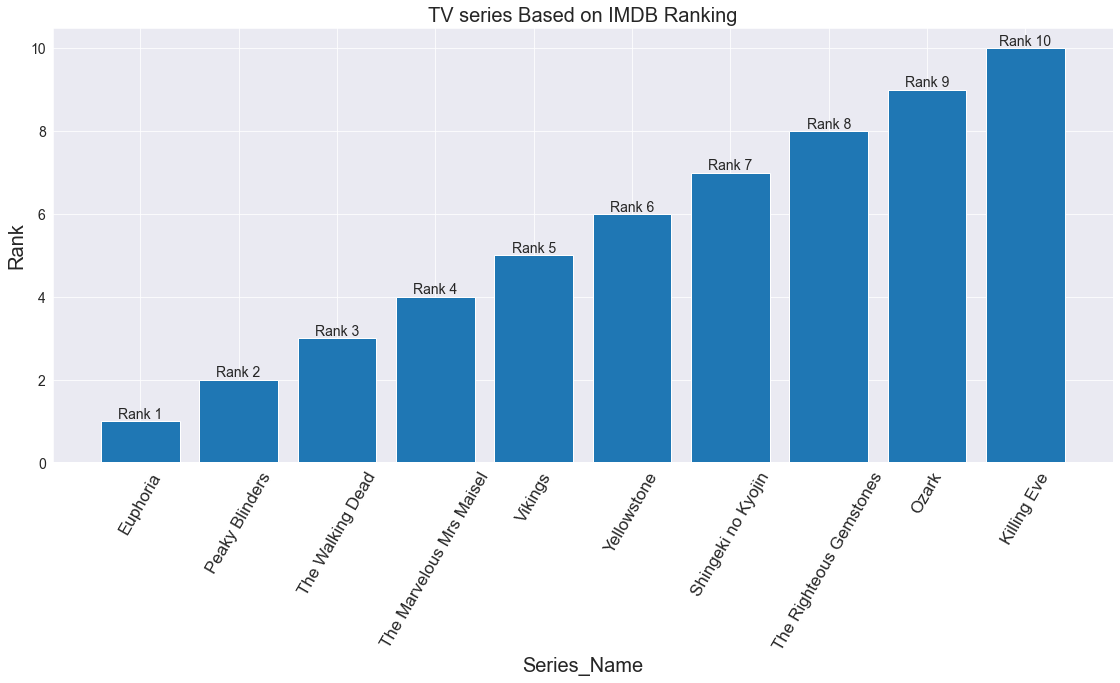

In [36]:

plt.figure(figsize=(19,8))


plt.title("TV series Based on IMDB Ranking",fontsize=20)

n = data["Series_Name"][:10]
s = data["Rank"][:10]
line = plt.bar(n,s)
plt.xlabel('Series_Name',fontsize = 20)
plt.ylabel("Rank",fontsize = 20)


plt.xticks(rotation = 60,fontsize = 17)
plt.yticks(fontsize = 14)




for i in range(len(s)):
    plt.annotate(f"Rank {s[i]}", xy=(n[i],s[i]), ha='center', va='bottom',fontsize = 14)



plt.show()

# 

## TV series Based on Rating

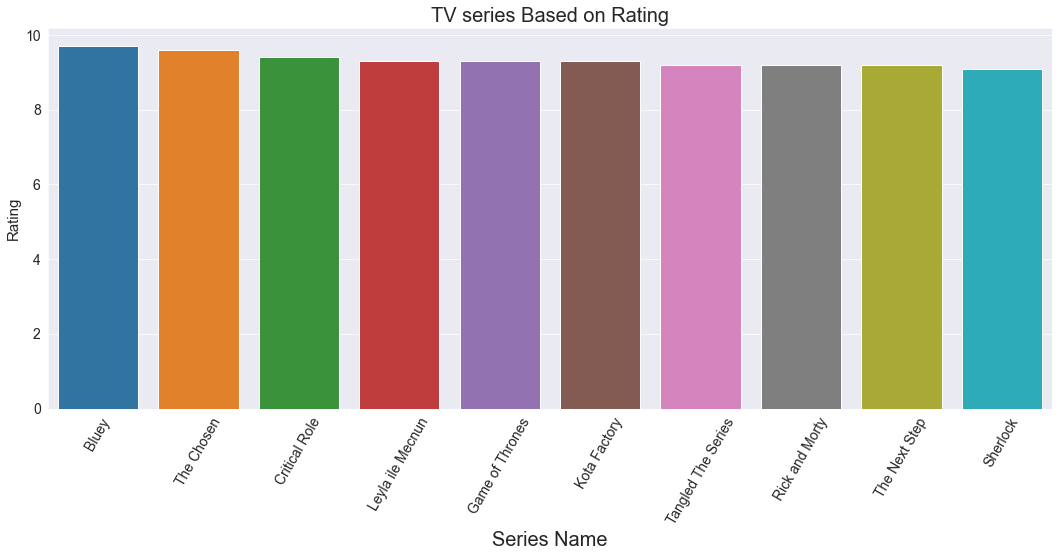

In [38]:
plt.figure(figsize=(18,7))
plt.title("TV series Based on Rating",fontsize=20)

rati= data.sort_values(['Rating'],ascending=False)
sns.barplot(x=rati['Series_Name'][:10], y=rati['Rating'][:10])

plt.xlabel("Series Name",fontsize=20)
plt.ylabel("Rating",fontsize=15)
plt.xticks(rotation = 60,fontsize = 14)
plt.yticks(fontsize = 14)


plt.show()

# 

## TV series Based on No of votings

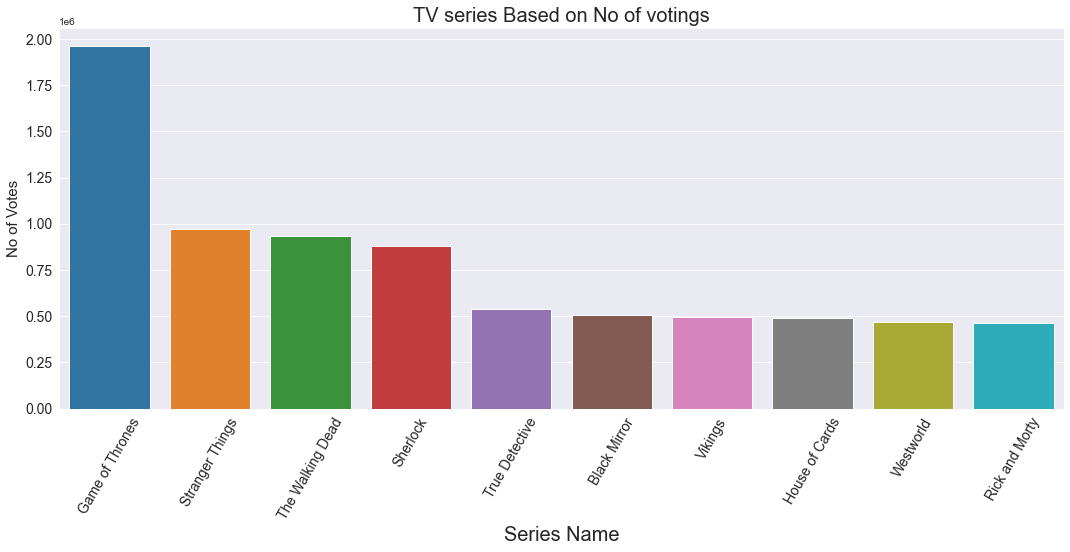

In [38]:
votes = data.sort_values(['No_of_votes'],ascending=False)

plt.figure(figsize=(18,7))
plt.title("TV series Based on No of votings",fontsize=20)
sns.barplot(x=votes['Series_Name'][:10], y=votes['No_of_votes'][:10])
plt.xlabel("Series Name",fontsize=20)
plt.ylabel("No of Votes",fontsize=15)
plt.xticks(rotation = 60,fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

# 

## TV Series Based on Rank & No of votings

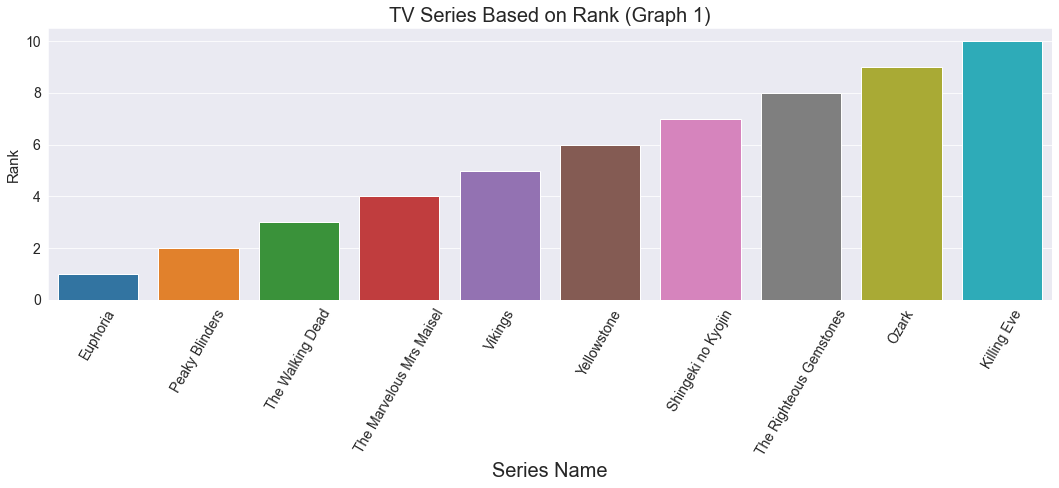

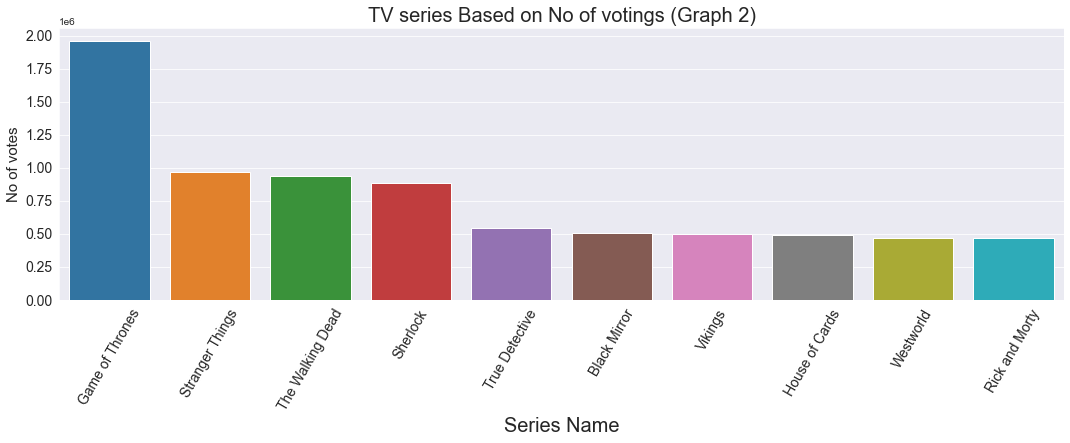

In [55]:
ranking = data.sort_values(['Rank'])
votes = data.sort_values(['No_of_votes'],ascending=False)

plt.figure(figsize=(18,5))
plt.title("TV Series Based on Rank (Graph 1)",fontsize=20)
a = sns.barplot(x=ranking['Series_Name'][:10], y=ranking['Rank'][:10],)

plt.xlabel("Series Name",fontsize=20)
plt.ylabel("Rank",fontsize=15)
plt.xticks(rotation = 60,fontsize = 14)
plt.yticks(fontsize = 14)

plt.figure(figsize=(18,5))
plt.title("TV series Based on No of votings (Graph 2)",fontsize=20)
sns.barplot(x=votes['Series_Name'][:10], y=votes['No_of_votes'][:10])


plt.xlabel("Series Name",fontsize=20)
plt.ylabel("No of votes",fontsize=15)
plt.xticks(rotation = 60,fontsize = 14)
plt.yticks(fontsize = 14)


plt.show()

### From the Above graph we can clearly see that  The Graph 1  is the ranking wise according IMDB

### From the Graph 2 we can see that Game of throns is the best TV Series According to user Rating

# 

## Correlation B/W all numarical columns

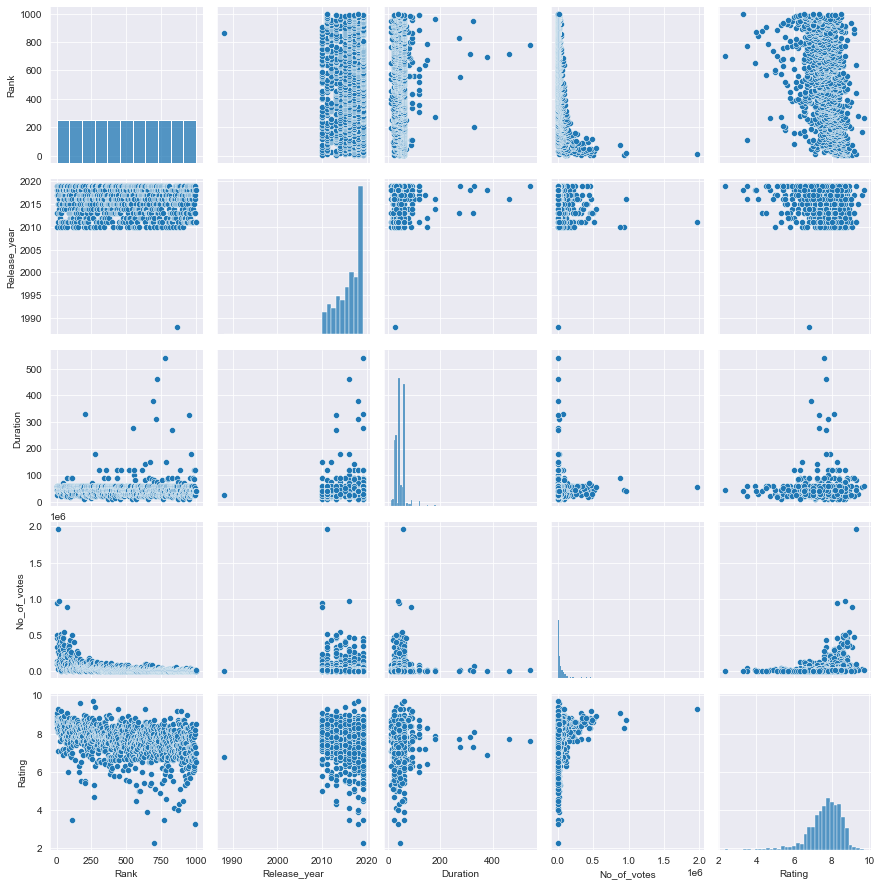

In [40]:

sns.pairplot(data = data) #vars=['Total_Revenue','Total_Profit','Total_Cost'])
plt.show()

###  From the Above pairplots we can see that there is no dependent variables 
### there is no correlation between the variables
### to look in deep we need using heatmap

# 

## Correlation B/W Rating and No of votes

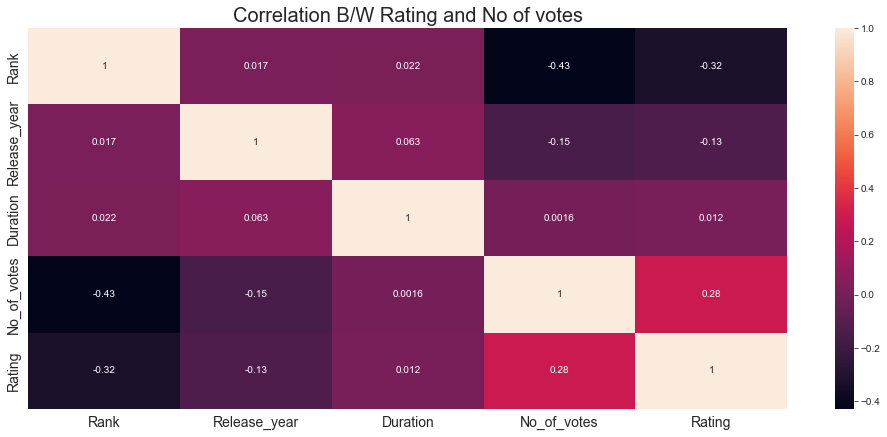

In [42]:
plt.figure(figsize=(17,7))
plt.title('Correlation B/W Rating and No of votes',fontsize=20)


plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


sns.heatmap(data.corr(), annot=True)
plt.show()

### From the above heat map we can see that No of votes is related to Rating of The TV Series

# 

## Correlation B/W Ranking and Duratio

C:\Users\SREE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



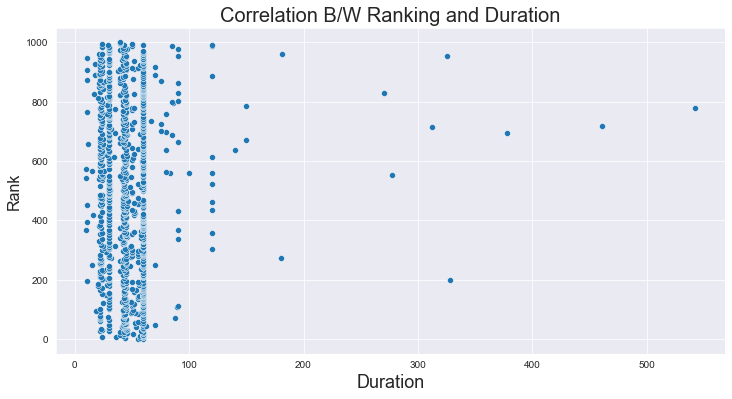

In [43]:
plt.figure(figsize=(12,6))
plt.xlabel('Duration', fontsize=18)
plt.ylabel('Rank', fontsize=16)
plt.title('Correlation B/W Ranking and Duration',fontsize=20)



sns.scatterplot(data["Duration"],data["Rank"])
plt.show()

# 

## Suggesting a TV Series based on Age

C:\Users\SREE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



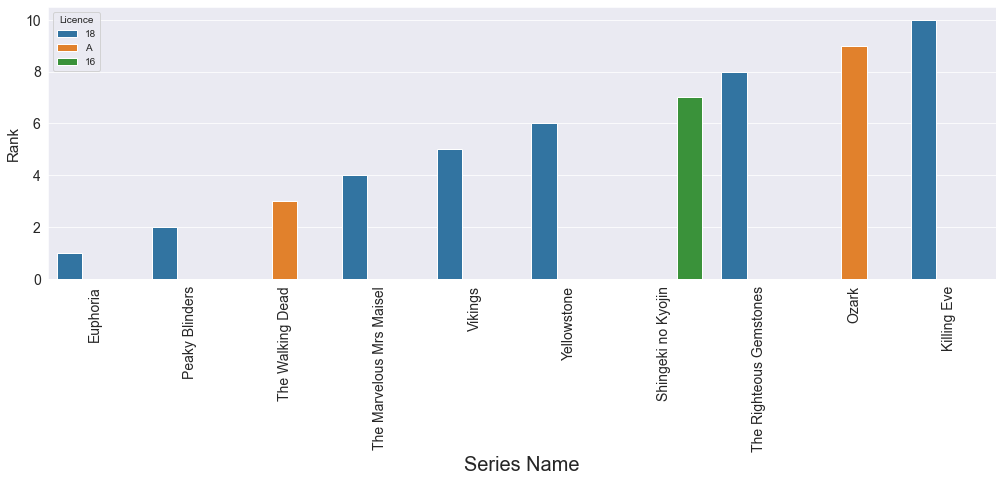

In [46]:
plt.figure(figsize=(17,5))

sns.barplot(data["Series_Name"][:10], data["Rank"][:10], hue = data["Licence"][:10],)

plt.xlabel("Series Name",fontsize=20)
plt.ylabel("Rank",fontsize=15)
plt.xticks(rotation = 90,fontsize = 14)
plt.yticks(fontsize = 14)


plt.show()

# 

## Suggesting TV Series based on their intrested Genre

C:\Users\SREE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



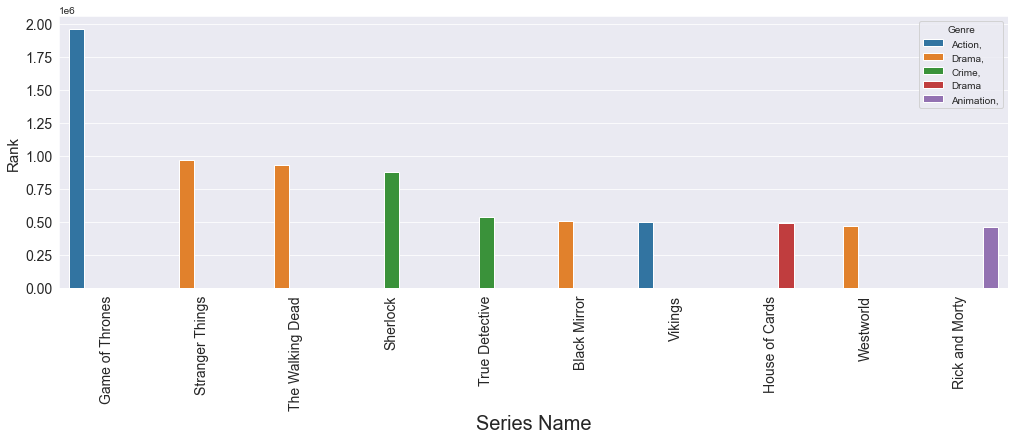

In [54]:
ranking = data.sort_values(['Rank'])
votes = data.sort_values(['No_of_votes'],ascending=False)


plt.figure(figsize=(17,5))

sns.barplot(votes["Series_Name"][:10], votes["No_of_votes"], hue = votes["Genre"][:10],)

plt.xlabel("Series Name",fontsize=20)
plt.ylabel("Rank",fontsize=15)
plt.xticks(rotation = 90,fontsize = 14)
plt.yticks(fontsize = 14)


plt.show()